In [1]:
from single_point import *
import pickle 

In [3]:
## This cell computes and stores the results of the lowerbound and upperbound LPs for regular and mhr distributions
qs = np.arange(0,21)*0.05
qs[-1] = 0.99
qs[0] = 0.01

w = 1
N = 3000
eta = 1e-5
b = 300

dict_results = {'regular': {}, 
                'mhr': {}}

for q in qs:
    dict_results['regular'][q] = {'lowerbound': lowerbound_LP_regular(w, q, q, eta = eta, b = b, N = N), 'upperbound': upperbound_LP_regular(w, q, q, eta = eta, b = b, N = N)}
    dict_results['mhr'][q] = {'lowerbound': lowerbound_LP_mhr(w, q, q, eta = eta, N = N), 'upperbound': upperbound_LP_mhr(w, q, q, eta = eta, N = N)}
    
with open('dict_results.pickle', 'wb') as handle:
    pickle.dump(dict_results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [2]:
## You can also load the pre-computed results using this cell
with open('dict_results.pickle', 'rb') as handle:
    dict_results = pickle.load(handle)

In [3]:
## Store the results in lists for plotting
qs = np.arange(0,21)*0.05
qs[-1] = 0.99
qs[0] = 0.01

lowerbounds_regular = [dict_results['regular'][q]['lowerbound']['bound'] for q in qs]
upperbounds_regular = [dict_results['regular'][q]['upperbound']['bound'] for q in qs]

lowerbounds_mhr = [dict_results['mhr'][q]['lowerbound']['bound'] for q in qs]
upperbounds_mhr = [dict_results['mhr'][q]['upperbound']['bound'] for q in qs]

deterministic_regular = [100*opt_deterministic_regular(q)[1] for q in qs]
deterministic_mhr = [100*opt_deterministic_mhr(q)[1] for q in qs]

deterministic_mech_regular = [opt_deterministic_regular(q)[0] for q in qs]
deterministic_mech_mhr = [opt_deterministic_mhr(q)[0] for q in qs]

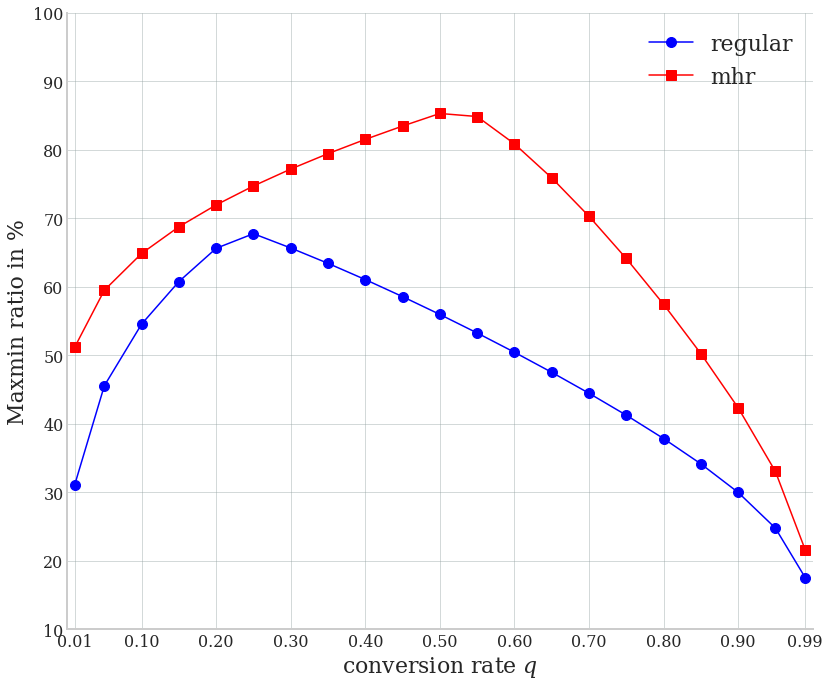

In [4]:
## Figure 1 plot
plt.rc('font', family='serif')
plt.rcParams['axes.linewidth'] = 2
plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

fig, ax = plt.subplots(figsize = (12,10))
fig.patch.set_facecolor('white')

ax.plot(qs, lowerbounds_regular, marker = 'o', label = r'regular', color = 'b', ms = 10)
ax.plot(qs, lowerbounds_mhr, marker = 's', label = r'mhr', color = 'r', ms = 10)

ax.set_xlabel(r'conversion rate $q$', fontsize=22)
ax.set_ylabel('Maxmin ratio in %', fontsize=22)

ax.grid(True, color="#93a1a1", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim(top = 100)
ax.set_yticks(np.arange(10, 110, 10))
ax.set_xlim(left = 0, right = 1)
qs_p = np.arange(0,11)*0.1
qs_p[-1] = 0.99
qs_p[0] = 0.01
ax.set_xticks(qs_p)

plt.legend(loc = 'best', prop={'size': 22})
plt.tight_layout()
plt.savefig('figures/figure_1.pdf')
plt.show()

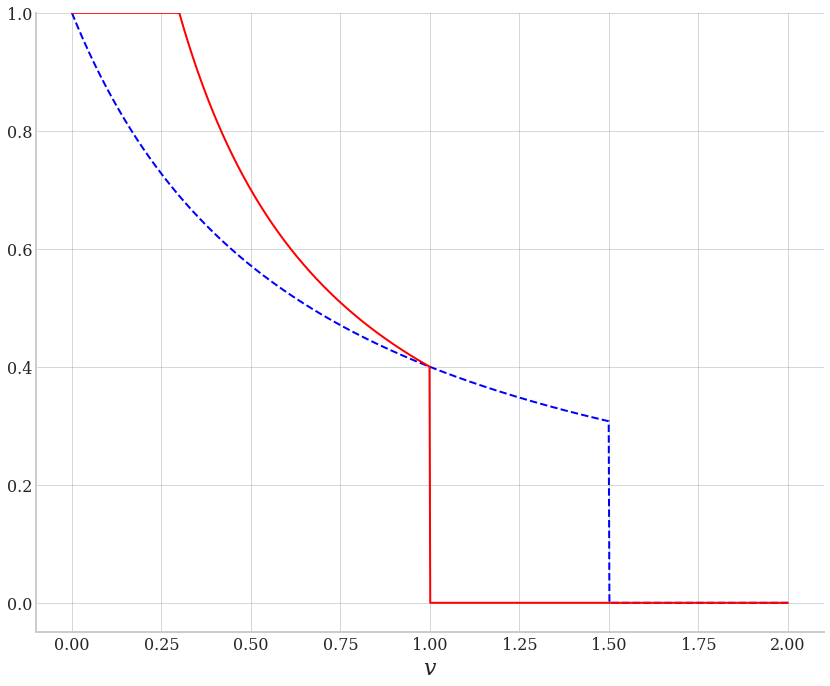

In [5]:
## Figure 2 plot
vs = np.linspace(0, 2, 1000)
example_1 = [F_alpha(0, 1, 0.4, 0.3, v) for v in vs]
example_2 = [F_alpha(0, 1, 0.4, 1.5, v) for v in vs]

fig, ax = plt.subplots(figsize = (12,10))
fig.patch.set_facecolor('white')

ax.plot(vs, example_2, ls = '--', color = 'b', lw = 2)
ax.plot(vs, example_1, label = r'mhr', color = 'r', lw = 2)

ax.set_xlabel(r'$v$', fontsize=22)

ax.grid(True, color="#93a1a1", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim(top = 1)
plt.tight_layout()
plt.savefig('figures/figure_2.pdf')
plt.show()

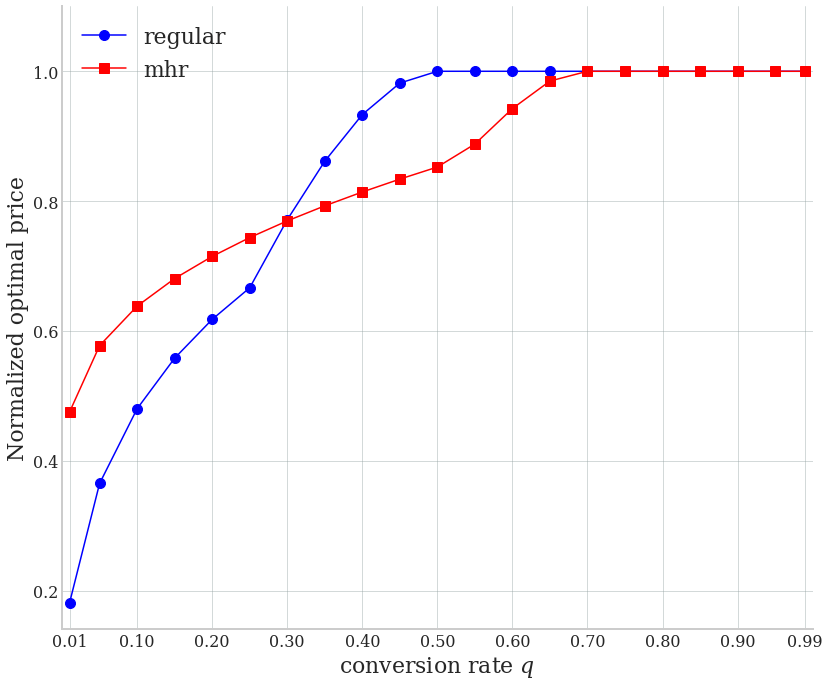

In [6]:
## Figure 4 plot
fig, ax = plt.subplots(figsize = (12,10))
fig.patch.set_facecolor('white')

ax.plot(qs, deterministic_mech_regular, marker = 'o', label = r'regular', color = 'b', ms = 10)
ax.plot(qs, deterministic_mech_mhr, marker = 's', label = r'mhr', color = 'r', ms = 10)

ax.set_xlabel(r'conversion rate $q$', fontsize=22)
ax.set_ylabel('Normalized optimal price', fontsize=22)

ax.grid(True, color="#93a1a1", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim(top = 1.1)
ax.set_xlim(left = 0, right = 1)
qs_p = np.arange(0,11)*0.1
qs_p[-1] = 0.99
qs_p[0] = 0.01
ax.set_xticks(qs_p)

plt.legend(loc = 'best', prop={'size': 22})
plt.tight_layout()
plt.savefig('figures/figure_4.pdf')
plt.show()

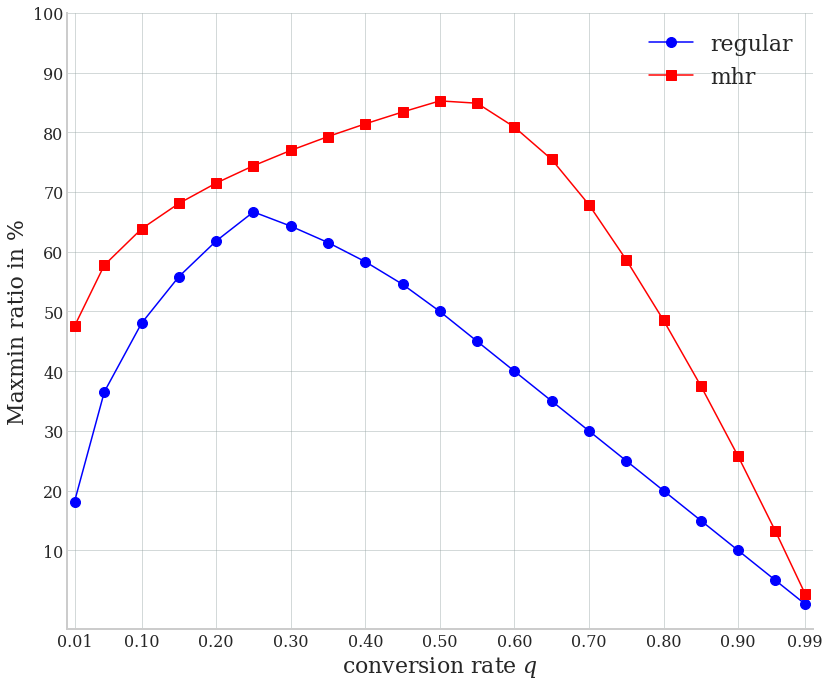

In [7]:
## Figure 5 plot
fig, ax = plt.subplots(figsize = (12,10))
fig.patch.set_facecolor('white')

ax.plot(qs, deterministic_regular, marker = 'o', label = r'regular', color = 'b', ms = 10)
ax.plot(qs, deterministic_mhr, marker = 's', label = r'mhr', color = 'r', ms = 10)

ax.set_xlabel(r'conversion rate $q$', fontsize=22)
ax.set_ylabel('Maxmin ratio in %', fontsize=22)

ax.grid(True, color="#93a1a1", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim(top = 100)
ax.set_yticks(np.arange(10, 110, 10))
ax.set_xlim(left = 0, right = 1)
qs_p = np.arange(0,11)*0.1
qs_p[-1] = 0.99
qs_p[0] = 0.01
ax.set_xticks(qs_p)

plt.legend(loc = 'best', prop={'size': 22})
plt.tight_layout()
plt.savefig('figures/figure_5.pdf')
plt.show()

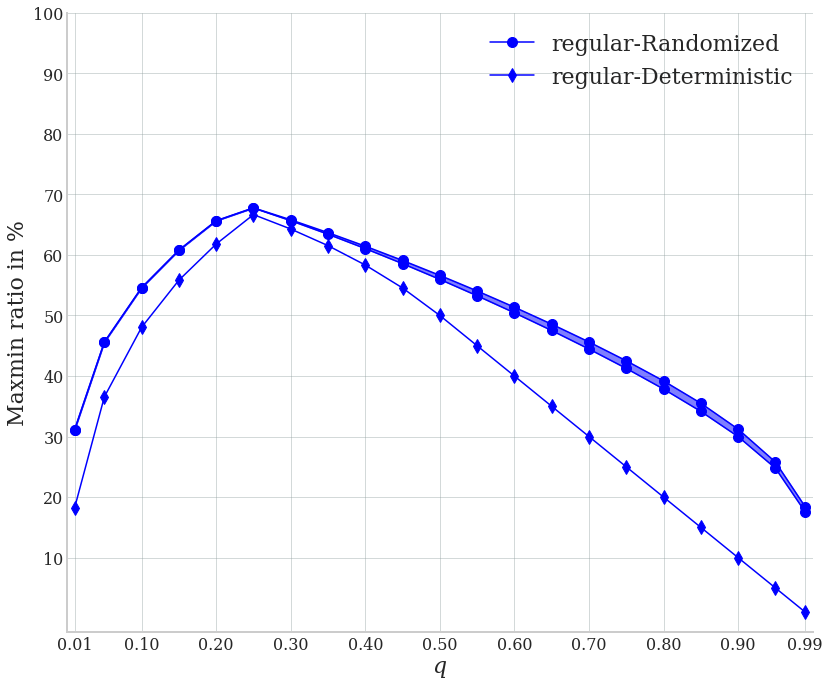

In [8]:
## Figure 6 regular 
fig, ax = plt.subplots(figsize = (12,10))
fig.patch.set_facecolor('white')

ax.plot(qs, lowerbounds_regular, marker = 'o', label = r'regular-Randomized', color = 'b', ms = 10)
ax.plot(qs, upperbounds_regular, marker = 'o', color = 'b', ms = 10)
ax.fill_between(qs, lowerbounds_regular, upperbounds_regular, color='b', alpha=0.5)

ax.plot(qs, deterministic_regular, marker = 'd', label = r'regular-Deterministic', color = 'b', ms = 10)

ax.set_xlabel(r'$q$', fontsize=22)
ax.set_ylabel('Maxmin ratio in %', fontsize=22)

ax.grid(True, color="#93a1a1", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim(top = 100)
ax.set_yticks(np.arange(10, 110, 10))
ax.set_xlim(left = 0, right = 1)
qs_p = np.arange(0,11)*0.1
qs_p[-1] = 0.99
qs_p[0] = 0.01
ax.set_xticks(qs_p)

plt.legend(loc = 'best', prop={'size': 22})
plt.tight_layout()
plt.savefig('figures/figure_6_regular.pdf')
plt.show()

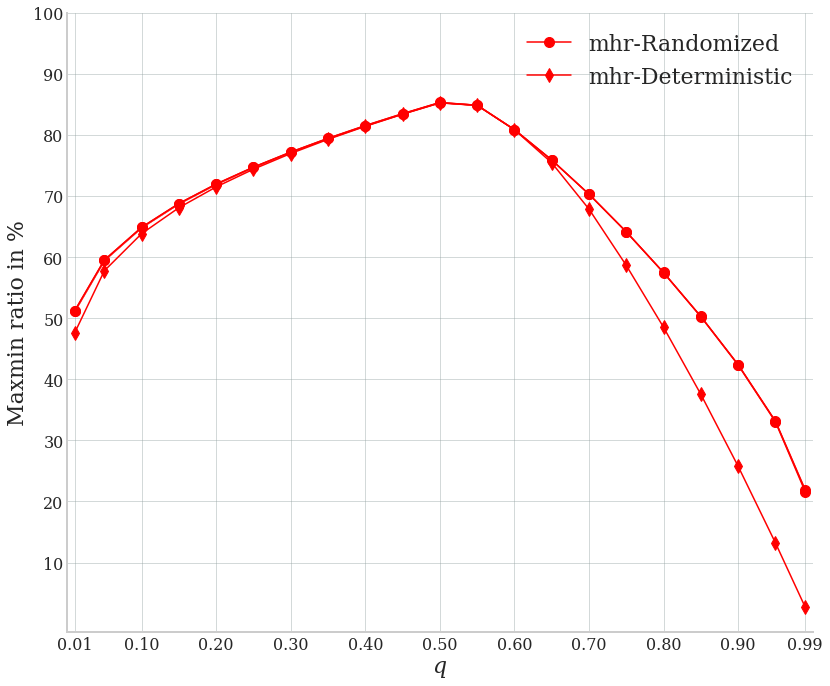

In [9]:
## Figure 6 mhr 
fig, ax = plt.subplots(figsize = (12,10))
fig.patch.set_facecolor('white')

ax.plot(qs, lowerbounds_mhr, marker = 'o', label = r'mhr-Randomized', color = 'red', ms = 10)
ax.plot(qs, upperbounds_mhr, marker = 'o', color = 'red', ms = 10)
ax.fill_between(qs, lowerbounds_mhr, upperbounds_mhr, color='red', alpha=0.5)

ax.plot(qs, deterministic_mhr, marker = 'd', label = r'mhr-Deterministic', color = 'red', ms = 10)

ax.set_xlabel(r'$q$', fontsize=22)
ax.set_ylabel('Maxmin ratio in %', fontsize=22)

ax.grid(True, color="#93a1a1", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim(top = 100)
ax.set_yticks(np.arange(10, 110, 10))
ax.set_xlim(left = 0, right = 1)
qs_p = np.arange(0,11)*0.1
qs_p[-1] = 0.99
qs_p[0] = 0.01
ax.set_xticks(qs_p)

plt.legend(loc = 'best', prop={'size': 22})
plt.tight_layout()
plt.savefig('figures/figure_6_mhr.pdf')
plt.show()

In [10]:
regular_mech_1 = dict_results['regular'][0.01]['lowerbound']['ai_s'], np.cumsum(dict_results['regular'][0.01]['lowerbound']['mech'])
regular_mech_75 = dict_results['regular'][0.75]['lowerbound']['ai_s'], np.cumsum(dict_results['regular'][0.75]['lowerbound']['mech'])

mhr_mech_1 = dict_results['mhr'][0.01]['lowerbound']['ai_s'], np.cumsum(dict_results['mhr'][0.01]['lowerbound']['mech'])
mhr_mech_75 = dict_results['mhr'][0.75]['lowerbound']['ai_s'], np.cumsum(dict_results['mhr'][0.75]['lowerbound']['mech'])

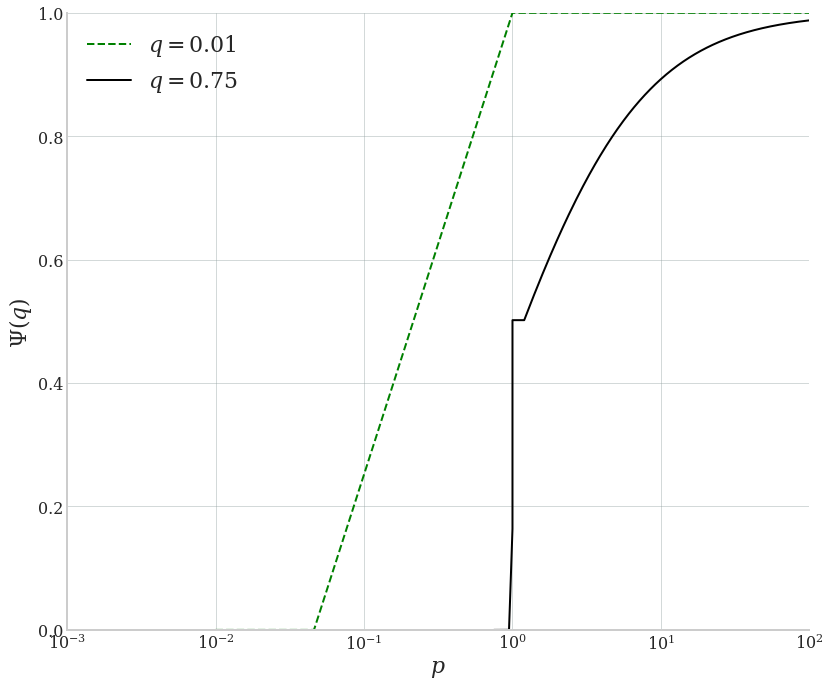

In [11]:
## Figure 7 regular
fig, ax = plt.subplots(figsize = (12,10))
fig.patch.set_facecolor('white')

ax.plot(regular_mech_1[0], regular_mech_1[1], ls = '--', color = 'green', label = r'$q=0.01$', lw = 2)
ax.plot(regular_mech_75[0], regular_mech_75[1], color = 'k', label = r'$q=0.75$', lw = 2)

ax.set_xlabel(r'$p$', fontsize=22)
ax.set_ylabel(r'$\Psi(q)$', fontsize=22)

ax.grid(True, color="#93a1a1", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xscale('log')
ax.set_ylim(bottom = 0, top = 1)
ax.set_xlim(left = 1e-3, right = 1e2)
plt.legend(loc = 'best', prop={'size': 22})
plt.tight_layout()
plt.savefig('figures/figure_7_regular.pdf')
plt.show()

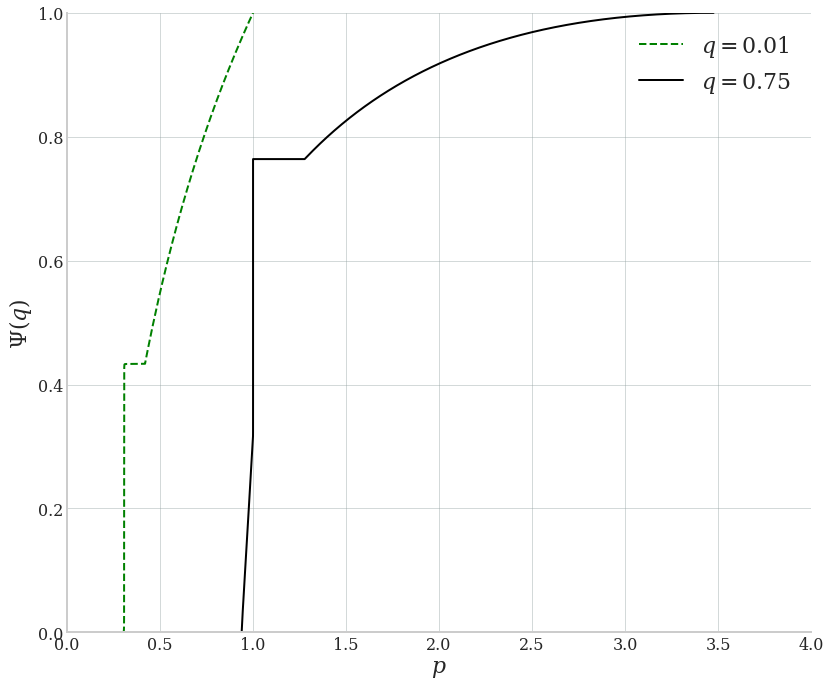

In [12]:
## Figure 7 mhr
fig, ax = plt.subplots(figsize = (12,10))
fig.patch.set_facecolor('white')

ax.plot(mhr_mech_1[0], mhr_mech_1[1], ls = '--', color = 'green', label = r'$q=0.01$', lw = 2)
ax.plot(mhr_mech_75[0], mhr_mech_75[1], color = 'k', label = r'$q=0.75$', lw = 2)

ax.set_xlabel(r'$p$', fontsize=22)
ax.set_ylabel(r'$\Psi(q)$', fontsize=22)

ax.grid(True, color="#93a1a1", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(bottom = 0, top = 1)
ax.set_xlim(left = 0, right = 4)
plt.legend(loc = 'best', prop={'size': 22})
plt.tight_layout()
plt.savefig('figures/figure_7_mhr.pdf')
plt.show()